#### Objectives and set-up
​
My main objective for this assignment is to familiarise with the concept of neural network by trying implementing a fully connected (dense) NN from scratch. In particular, I wanted to:
+ compute the derivations of gradients with backpropagation
+ experiment using softmax as the activation function for the output layer and cross-entropy as the loss function
+ explore gradient descent, minibatch gradient descent and gradient descent with momentum as optimisation techniques
​

My NN tries addressing a multi-classification problem. It takes as input 16x16pxl digit images from the MNIST database and tries predicting the correspondent label between 0 and 9. I make use of two hidden layers of 128 neurons each and an output layer of 10 neurons.
​

#### Notation
​
Output layer: neurons k = 1,...,10 <br>
Hidden layer (2): neurons j = 1,...,128 <br>
Hidden layer (1): neurons i = 1,...,128<br>
Input: m = 1,...,64<br>
Weights: w_{k,j} with k next layer, j previous layer
​
    
​
#### Computing the gradients for one observation
​
##### Output layer
​
Loss function:
​
\begin{equation}
L = -\sum_{k=1}^{10}y_klog{(z_k^{(3)})} 
\end{equation}
​
where:
​
\begin{equation}
z_k^{(3)} = \frac{e^{a_k^{(3)}}}{\sum_{k=1}^{10}e^{a_k^{(3)}}}\\
\end{equation}
\begin{equation}
a_k^{(3)} = \sum_{j=1}^{128}w_{kj}^{(3)}z_j^{(2)}
\end{equation}
​
By chain-rule, derivatives for the weights connecting the second to the third layer can be obtained as follows:
​
\begin{equation}
\frac{\partial L}{\partial w_{kj}^{(3)}} =
( \sum_{k'=1}^{10}\frac{\partial L}{\partial z_{k'}^{(3)}}
\frac{\partial z_{k'}^{(3)}}{\partial a_k^{(3)}})
\frac{\partial a_k^{(3)}}{\partial w_{kj}^{(3)}}
\end{equation}
​
where:
\begin{equation}
\begin{split}
\frac{\partial a_k^{(3)}}{\partial w_{kj}^{(3)}} = z_j^{(2)}\\
\frac{\partial z_k^{(3)}}{\partial a_k^{(3)}} = z_k^{(3)} (1 - z_k^{(3)})\\
\frac{\partial z_{k'}^{(3)}}{\partial a_k^{(3)}} = -z_{k'}^{(3)} z_k^{(3)} \text{ for k'} \neq \text{k}\\
 \sum_{k'=1}^{10}\frac{\partial L}{\partial z_{k'}^{(3)}}
\frac{\partial z_{k'}^{(3)}}{\partial a_k^{(3)}} = -y_k(1-z_{k}^{(3)})+z_{k}^{(3)}\sum_{k'\neq k}y_{k'} = z_{k}^{(3)} - y_k
\end{split}
\end{equation}
​
Thus we obtain:
\begin{equation}
\frac{\partial L}{\partial w_{kj}^{(3)}} = (z_{k}^{(3)} - y_k)z_j^{(2)}
\end{equation}
​
​
##### Hidden layer (2)
​
Similarly, by chain-rule, derivatives for the weights connecting the first to the second layer can be obtained as follows:
​
\begin{equation}
\frac{\partial L}{\partial w_{ji}^{(2)}} =
\frac{\partial L}{\partial z_{j}^{(2)}}
\frac{\partial z_{j}^{(2)}}{\partial a_j^{(2)}}
\frac{\partial a_j^{(2)}}{\partial w_{ji}^{(2)}}
\end{equation}
​
where:
​
\begin{equation}
z_j^{(2)} = \sigma(a_j^{(2)})=\frac{1}{1+e^{-a_j{(2)}}}\\
\end{equation}
​
\begin{equation}
a_j^{(2)} = \sum_{i=1}^{128}w_{ji}^{(2)}z_i^{(2)}
\end{equation}
​
We can solve each block in the following way:
​
\begin{equation}
\begin{split}
\frac{\partial a_j^{(2)}}{\partial w_{ji}^{(2)}} = z_i^{(1)}\\
\frac{\partial z_{j}^{(2)}}{\partial a_j^{(2)}} = \sigma(a_{j}^{(2)})(1-\sigma(a_{j}^{(2)})) = z_{j}^{(2)}(1-z_{j}^{(2)})\\
\frac{\partial L}{\partial z_{j}^{(2)}} = 
\sum_{k'=1}^{10}\frac{\partial L}{\partial z_{k'}^{(3)}}
\frac{\partial z_{k'}^{(3)}}{\partial a_{k'}^{(3)}}
\frac{\partial a_{k'}^{(3)}}{\partial z_{j}^{(2)}} = 
\sum_{k'=1}^{10}(z_{k'}^{(3)} - y_{k'})w_{k'j}^{(3)}\\
\end{split}
\end{equation}
​
Thus we obtain:
\begin{equation}
\frac{\partial L}{\partial w_{ji}^{(2)}} =
(\sum_{k'=1}^{10}(z_{k'}^{(3)} - y_{k'})w_{k'j}^{(3)})
z_{j}^{(2)}(1-z_{j}^{(2)})
z_i^{(1)}
\end{equation}
​
##### Hidden layer (1)
​
Finally, for weights from the input to the first layer:
​
\begin{equation}
\frac{\partial L}{\partial w_{im}^{(1)}} =
\frac{\partial L}{\partial z_{i}^{(1)}}
\frac{\partial z_{i}^{(1)}}{\partial a_i^{(1)}}
\frac{\partial a_i^{(1)}}{\partial w_{im}^{(1)}}
\end{equation}
​
where:
​
\begin{equation}
z_i^{(1)} = \sigma(a_i^{(1)})=\frac{1}{1+e^{-a_i{(1)}}}\\
\end{equation}
​
\begin{equation}
a_i^{(1)} = \sum_{m=1}^{64}w_{im}^{(2)}x_m
\end{equation}
​
​
We can solve each block in the following way:
​
\begin{equation}
\begin{split}
\frac{\partial a_1^{(1)}}{\partial w_{im}^{(1)}} = x_m\\
\frac{\partial z_{i}^{(1)}}{\partial a_i^{(1)}} = \sigma(a_{i}^{(1)})(1-\sigma(a_{i}^{(1)})) = z_{i}^{(1)}(1-z_{i}^{(1)})\\
\frac{\partial L}{\partial z_{i}^{(1)}} = 
\sum_{j'=1}^{100}\frac{\partial L}{\partial z_{j'}^{(2)}}
\frac{\partial z_{j'}^{(2)}}{\partial a_{j'}^{(2)}}
\frac{\partial a_{j'}^{(2)}}{\partial z_{i}^{(1)}} = 
\sum_{j'=1}^{100}(\sum_{k'=1}^{10}(z_{k'}^{(3)} - y_{k'})w_{k'j'}^{(3)})z_{j'}^{(2)}(1-z_{j'}^{(2)}) w_{j'i}^{(2)}\\
\end{split}
\end{equation}
​
Thus we obtain:
\begin{equation}
\frac{\partial L}{\partial w_{im}^{(1)}} =
\sum_{j'=1}^{100}
(\sum_{k'=1}^{10}(z_{k'}^{(3)} - y_{k'})w_{k'j'}^{(3)})
z_{j'}^{(2)}(1-z_{j'}^{(2)})
w_{j'i}^{(2)}
z_{i}^{(1)}(1-z_{i}^{(1)})
x_m
\end{equation}
​
#### Weight update
​
The loss function for the whole X data matrix is just the sum of the loss functions for each observation. It follows that its gradient with respect to the weights is also the sum of the derivatives. It is thus convenient to represent gradients for the loss function for input digits 1,...,n in matricial form:
​

\begin{equation}
\frac{\partial L}{\partial W^{(3)}} = (\underset{10\times n}Z^{(3)}-\underset{10\times n}Y^{T})\underset{n\times 128}Z^{(2)}
\end{equation}
​
\begin{equation}
\frac{\partial L}{\partial W^{(2)}} = \left[\underset{128\times 10}W^{(3)T}(\underset{10\times n}Z^{(3)}-\underset{10\times n}Y^{T})*\left[\sigma(\underset{128\times n}Z^{(2)})(1-\sigma(\underset{128\times n}Z^{(2)})\right]\right]\underset{n\times 128}Z^{(1)T}
\end{equation}
​
\begin{equation}
\frac{\partial L}{\partial W^{(1)}} = \underset{128\times 128}W^{(2)T}\left[\underset{128\times 10}W^{(3)T}(\underset{10\times n}Z^{(3)}-\underset{10\times n}Y^{T})*\left[\sigma(\underset{128\times n}Z^{(2)})(1-\sigma(\underset{128\times n}Z^{(2)})\right]\right]*\left[\sigma(\underset{128\times n}Z^{(1)})(1-\sigma(\underset{128\times n}Z^{(1)})\right]\underset{n\times 64}X
\end{equation}
​

where * indicates the pairwise product.
​
The gradient descent updates are thus the following:
​

\begin{equation}
\begin{split}
W^{(3)}_{t+1} = W^{(3)}_{t} - lr*\frac{\partial L}{\partial W^{(3)_{t}}} \\
W^{(2)}_{t+1} = W^{(2)}_{t} - lr*\frac{\partial L}{\partial W^{(2)_{t}}} \\
W^{(1)}_{t+1} = W^{(1)}_{t} - lr*\frac{\partial L}{\partial W^{(1)_{t}}} \\
\end{split}
\end{equation}
​
where lr is the chosen learning rate.

In [562]:
#Relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.datasets import load_digits
import time

In [88]:
dig = load_digits()
y = np.array(pd.get_dummies(dig.target))
X = dig.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [89]:
#Rescaling
X_train = X_train/16.0
X_test = X_test/16.0

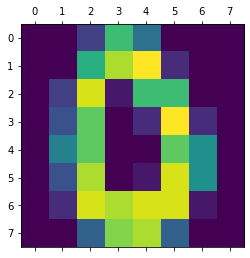

In [5]:
plt.matshow(X_train[40].reshape(8,8))

In [554]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

def softmax(z_vec):
    exps = np.exp(z_vec-np.max(z_vec, axis = 0,keepdims=True)) #shifted softmax to avoid exp(0)
    return exps/np.sum(exps, axis=0, keepdims=True)

def sigmoid_deriv(a):
    return a*(1-a)

def cross_entropy(y,y_hat):
    return -np.sum(np.multiply(y,np.log(y_hat)))/y.shape[0]
    


In [550]:
def feedforward(X, W1, W2,W3):
    a1 = W1@X.T
    z1 = sigmoid(a1) #(128,len(y))
    
    a2 = W2@z1
    z2 = sigmoid(a2) #(128,len(y))
    
    a3 = W3@z2
    z3 = softmax(a3) #(10,len(y))
    return z1,z2,z3

In [555]:
def backprop(X,y,W3,W2,W1,z1,z2,z3,lr):
    dL_dW3=0
    dL_dW2=0
    dL_dW1=0
    
    #Outer layer
    z3_delta = (z3 - y.T)/y_train.shape[0] #matrix (k,obs) = (10, n)
    dL_dW3 += z3_delta@z2.T  #matrix (k,j) = (10,100) 
    
    
    #Hidden layer (2)
    dL_z2 = W3.T@z3_delta #matrix (j,obs) = (128,n) 
    dL_a2 = dL_z2*sigmoid_deriv(z2) #pairwise product: matrix (j,obs) = (128,n) 
    dL_dW2 += dL_a2@z1.T #matrix (j,i) = (128,128) 
    
    
    #Hidden layer (1)
    dL_z1= W2.T@dL_a2 #matrix (i, obs) = (128, len(y)) 
    dL_a1 = dL_z1*sigmoid_deriv(z1) #pairwise product: matrix (i, obs) = (128, n)
    dL_dW1 += dL_a1@X #matrix (i,m) = (100,64) 

    return dL_dW3,dL_dW2,dL_dW1

In [ ]:
def predict(X_oneobs,W3,W2,W1):
    z1,z2,z3 = feedforward(X_oneobs, W1, W2,W3)
    return z3.argmax()

def get_acc(X, y,W3,W2,W1):
    acc = 0
    for X_oneobs,y_oneobs in zip(X, y):
        s = predict(X_oneobs, W3,W2,W1)
        if s == np.argmax(y_oneobs):
            acc +=1
    return acc/len(X)*100

#### Gradient descent

I first tried simply implementing gradient descent on the whole dataset:

In [680]:
#All training set
neurons_hiddenlr = 128
lr = 0.5
epochs = 300
np.random.seed(136)

W1 = np.random.randn(neurons_hiddenlr, X_train.shape[1])
W2 = np.random.randn(neurons_hiddenlr, neurons_hiddenlr)
W3 = np.random.randn(y_train.shape[1],neurons_hiddenlr)
loss = []

time_start = time.perf_counter()
for e in range(1,epochs):
    z1,z2,z3 = feedforward(X_train, W1, W2,W3)
    dL_dW3,dL_dW2,dL_dW1 = backprop(X_train,y_train,W3,W2,W1,z1,z2,z3,lr)
    loss.append(cross_entropy(y_train,z3.T))

    W3-= lr*dL_dW3
    W2-= lr*dL_dW2
    W1-= lr*dL_dW1
time_elapsed = time.perf_counter()-time_start

As we can see, the loss function shows an exponential behavior and already drops to values close to zero after 25 epochs:

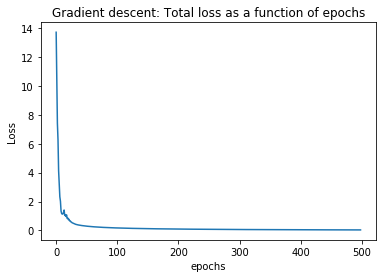

In [649]:
plt.plot(loss)
plt.title('Gradient descent: Total loss as a function of epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

As a result, accuracy is pretty high on train and test set after 200 epochs:

In [681]:
print("Accuracy on train set: ", get_acc(X_train,y_train,W3,W2,W1))
print("Accuracy on test set: ", get_acc(X_test,y_test,W3,W2,W1))
print("Time elapsed:", time_elapsed)

Accuracy on train set:  99.01051329622759
Accuracy on test set:  96.11111111111111
Time elapsed: 4.561187310995592


#### Minibatch gradient descent

However, for larger datasets this optimisation technique might be computationally unfeasible. I thus tried implementing a minibatch gradient descent where the dataset is first reshuffled and then batched, and weight update is done iteratively over all batches. My expectation is that the algorithm will be faster, with comparable accuracy.

In [694]:
#With minibatch gradient descent
neurons_hiddenlr = 128
lr = 0.5
batch_size = 200
obs = y_train.shape[0]
np.random.seed(16)

W1 = np.random.randn(neurons_hiddenlr, X_train.shape[1])
W2 = np.random.randn(neurons_hiddenlr, neurons_hiddenlr)
W3 = np.random.randn(y_train.shape[1],neurons_hiddenlr)

loss = []
time_start = time.perf_counter()

for i in range(300):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    for b in range(0,obs,batch_size):
        X = X_train_shuffled[b:b+batch_size]
        y = y_train_shuffled[b:b+batch_size]
        
        z1,z2,z3 = feedforward(X, W1,W2,W3)
        dL_dW3,dL_dW2,dL_dW1 = backprop(X,y,W3,W2,W1,z1,z2,z3,lr)
        
        W3-= lr*dL_dW3
        W2-= lr*dL_dW2
        W1-= lr*dL_dW1
        
        loss.append(cross_entropy(y,z3.T)) 
time_elapsed = time.perf_counter()-time_start

We can see that the loss converges to zero slower than in the first case:

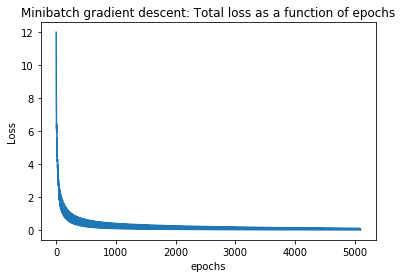

In [683]:
plt.plot(loss)
plt.title('Minibatch gradient descent: Total loss as a function of epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

Accuracy is comparable (slightly higher) but surprisingly the algorithm is slower. My guess is that the reshuffling takes up for the additional time in this case.

In [695]:
print("Accuracy on train set: ", get_acc(X_train,y_train,W3,W2,W1))
print("Accuracy on test set: ", get_acc(X_test,y_test,W3,W2,W1))
print("Time elapsed:", time_elapsed)

Accuracy on train set:  99.13419913419914
Accuracy on test set:  95.55555555555556
Time elapsed: 5.181228951005323


#### Minibatch gradient descent with momentum

In order to investigate different optimisation techniques, I implemented a minibatch gradient descent adding some momentum. My aim was to see whether performance showed an improvement as a result.

In [696]:
# With minibatch gradient descent and momentum:
neurons_hiddenlr = 128
lr = 0.5
batch_size = 200
obs = y_train.shape[0]
np.random.seed(14)

W1 = np.random.randn(neurons_hiddenlr, X_train.shape[1])
W2 = np.random.randn(neurons_hiddenlr, neurons_hiddenlr)
W3 = np.random.randn(y_train.shape[1],neurons_hiddenlr)

V_dW1 = np.zeros(W1.shape)
V_dW2 = np.zeros(W2.shape)
V_dW3 = np.zeros(W3.shape)

beta = 0.7

loss = []
time_start = time.perf_counter()

for i in range(300):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    for b in range(0,obs,batch_size):
        X = X_train_shuffled[b:b+batch_size]
        y = y_train_shuffled[b:b+batch_size]
        
        z1,z2,z3 = feedforward(X, W1,W2,W3)
        dL_dW3,dL_dW2,dL_dW1 = backprop(X,y,W3,W2,W1,z1,z2,z3,lr)
        
        V_dW1 = (beta * V_dW1 + (1. - beta) * dL_dW1)
        V_dW2 = (beta * V_dW2 + (1. - beta) * dL_dW2)
        V_dW3 = (beta * V_dW3 + (1. - beta) * dL_dW3)
        
        W3-= lr*V_dW3
        W2-= lr*V_dW2 
        W1-= lr*V_dW1
        
        loss.append(cross_entropy(y,z3.T)) 
time_elapsed = time.perf_counter()-time_start

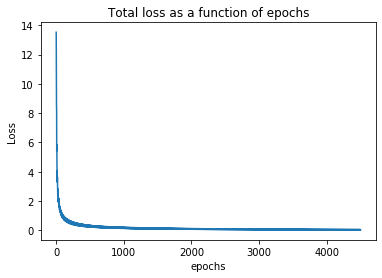

In [667]:
plt.plot(loss)
plt.title('Total loss as a function of epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

Interestingly, there is no gain in accuracy, while time elapsed is slightly higher:

In [697]:
print("Accuracy on train set: ", get_acc(X_train,y_train,W3,W2,W1))
print("Accuracy on test set: ", get_acc(X_test,y_test,W3,W2,W1))
print("Time elapsed:", time_elapsed)

Accuracy on train set:  98.76314162028447
Accuracy on test set:  94.44444444444444
Time elapsed: 5.328477880000719


#### Performance as a function of batch size

I was also curious to check performance as a function of the batch size. To this end, I use the minibatch gradient descent without momentum, as momentum has not given a sensible improvement to the algorithm in this case.

In [ ]:
#minibatch gradient descent for different batch sizes
neurons_hiddenlr = 128
lr = 0.5
obs = y_train.shape[0]

W1 = np.random.randn(neurons_hiddenlr, X_train.shape[1])
W2 = np.random.randn(neurons_hiddenlr, neurons_hiddenlr)
W3 = np.random.randn(y_train.shape[1],neurons_hiddenlr)
np.random.seed(12)

loss_by_batchsize = {}
time_by_batchsize = {}
for bs in range(1,1000,50):
    loss = []
    time_start = time.perf_counter()
    for i in range(300):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]
        for b in range(0,obs,bs):
            X = X_train_shuffled[b:b+bs]
            y = y_train_shuffled[b:b+bs]

            z1,z2,z3 = feedforward(X, W1,W2,W3)
            dL_dW3,dL_dW2,dL_dW1 = backprop(X,y,W3,W2,W1,z1,z2,z3,lr)

            W3-= lr*dL_dW3
            W2-= lr*dL_dW2
            W1-= lr*dL_dW1

            loss.append(cross_entropy(y,z3.T)) 
    time_by_batchsize[f'{bs}'] = (time.perf_counter() - time_start)
    loss_by_batchsize[f'{bs}'] = np.mean(loss)

We can see that as batch size increases the average loss seems to decrease, while the time elapsed shows an increasing trend, thus representing a trade-off:

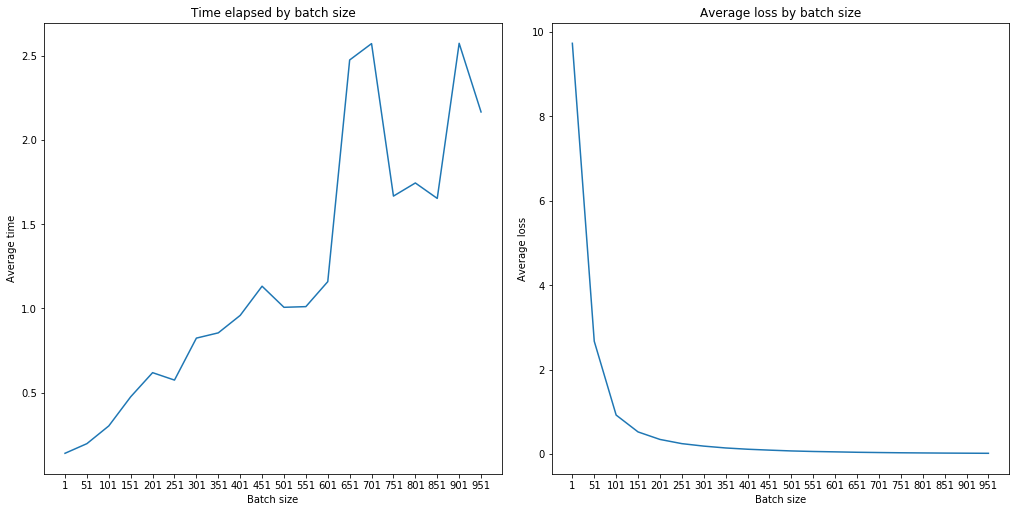

In [594]:
fig, (ax1,ax2) = plt.subplots(1, 2,  constrained_layout=True,figsize=(14,7))

ax1.plot(list(time_by_batchsize.keys()), list(time_by_batchsize.values()))
ax1.set_title('Time elapsed by batch size')
ax1.set_ylabel('Average time')
ax1.set_xlabel('Batch size')

ax2.plot(list(loss_by_batchsize.keys()), list(loss_by_batchsize.values()))
ax2.set_title('Average loss by batch size')
ax2.set_ylabel('Average loss')
ax2.set_xlabel('Batch size')
plt.show()